In [1]:
# 필수 라이브러리 설치
!pip install faster-whisper
!pip install torch torchaudio
!pip install librosa
!pip install jiwer  # CER 계산용

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 104.8 MB/s eta 0:00:00


In [2]:
!pip install noisereduce

In [3]:
import torch
import librosa
import numpy as np
from faster_whisper import WhisperModel
from jiwer import cer
import soundfile as sf

In [4]:
# Whisper large-v3 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"사용 디바이스: {device}")

model = WhisperModel(
    "large-v3",
    device=device,
    compute_type="float16" if device == "cuda" else "int8"
)
print("모델 로드 완료!")

사용 디바이스: cuda


tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

모델 로드 완료!


In [5]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# 오디오 로드
audio_path = "/content/애슐리_소음.m4a"  # 여기에 실제 파일 경로 입력
audio, sr = librosa.load(audio_path, sr=16000)

# 기본 정보
print(f"오디오 길이: {len(audio) / sr:.2f}초")
print(f"최대 진폭: {np.max(np.abs(audio)):.4f}")
print(f"평균 진폭: {np.mean(np.abs(audio)):.4f}")
print(f"RMS 에너지: {np.sqrt(np.mean(audio**2)):.4f}")

# 진폭이 0.01 미만이면 매우 조용함
if np.max(np.abs(audio)) < 0.01:
    print("⚠️ 경고: 오디오가 너무 조용합니다!")

/tmp/ipython-input-1020891952.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=16000)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


오디오 길이: 2521.22초
최대 진폭: 1.0066
평균 진폭: 0.0623
RMS 에너지: 0.0873


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

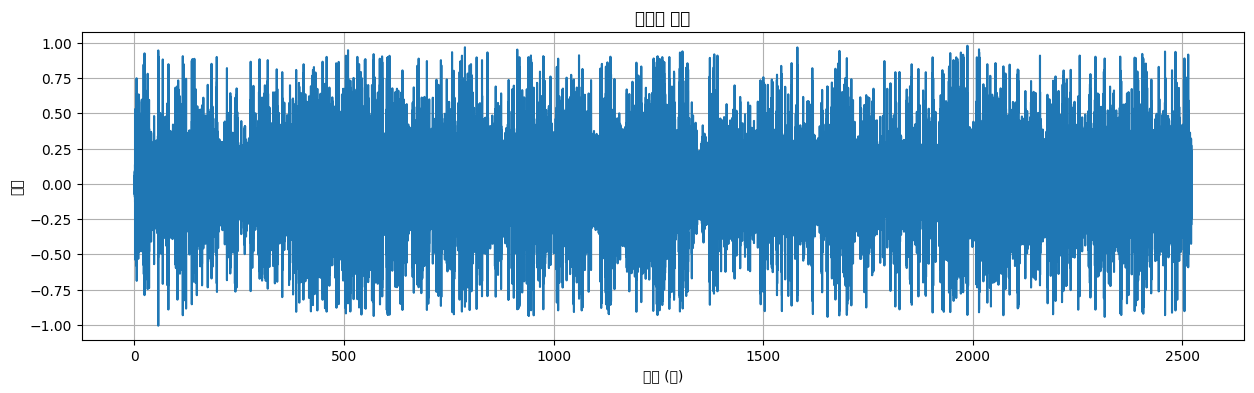

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

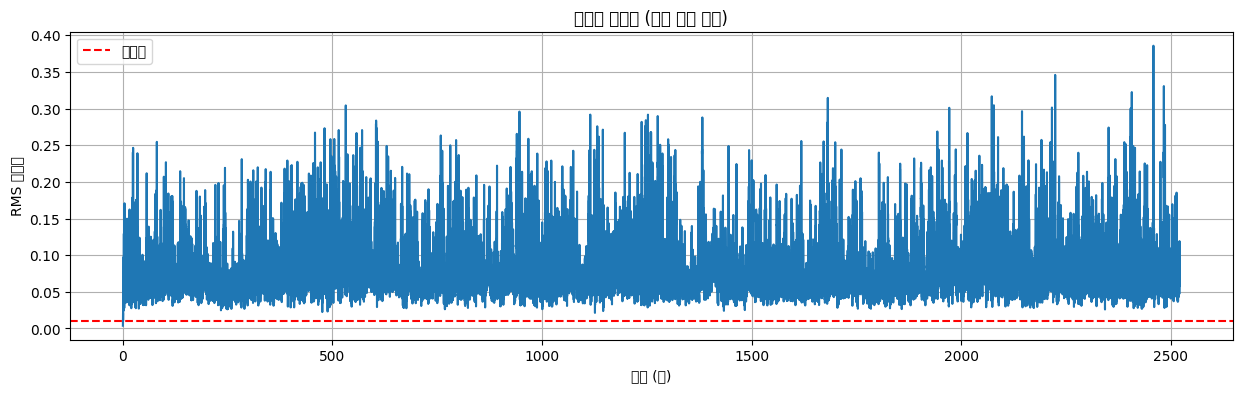

In [6]:
# 파형 시각화
plt.figure(figsize=(15, 4))
time = np.linspace(0, len(audio) / sr, len(audio))
plt.plot(time, audio)
plt.xlabel('시간 (초)')
plt.ylabel('진폭')
plt.title('오디오 파형')
plt.grid(True)
plt.show()

# 음성 구간 확인
plt.figure(figsize=(15, 4))
energy = librosa.feature.rms(y=audio)[0]
times = librosa.times_like(energy, sr=sr)
plt.plot(times, energy)
plt.xlabel('시간 (초)')
plt.ylabel('RMS 에너지')
plt.title('오디오 에너지 (음성 구간 확인)')
plt.axhline(y=0.01, color='r', linestyle='--', label='임계값')
plt.legend()
plt.grid(True)
plt.show()

In [7]:

import noisereduce as nr
import soundfile as sf
import librosa
import numpy as np

# 오디오 로드
audio_path = "/content/애슐리_소음.m4a"  # 여기에 실제 파일 경로 입력
audio, sr = librosa.load(audio_path, sr=16000)

print("원본 오디오:")
print(f"  RMS 에너지: {np.sqrt(np.mean(audio**2)):.4f}")

# 노이즈 프로파일 추정 (처음 2초를 노이즈로 가정)
noise_sample = audio[:sr*2]  # 처음 2초

# 노이즈 제거
audio_denoised = nr.reduce_noise(
    y=audio,
    sr=sr,
    y_noise=noise_sample,  # 노이즈 샘플
    prop_decrease=0.8,  # 80% 제거
    stationary=False,  # 비정적 노이즈 (식사 소리 등)
    freq_mask_smooth_hz=500,
    time_mask_smooth_ms=50
)

print("노이즈 제거 후:")
print(f"  RMS 에너지: {np.sqrt(np.mean(audio_denoised**2)):.4f}")

# 저장
denoised_path = "denoised_audio.wav"
sf.write(denoised_path, audio_denoised, sr)
print(f"저장 완료: {denoised_path}")

/tmp/ipython-input-602996982.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=16000)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


원본 오디오:
  RMS 에너지: 0.0873
노이즈 제거 후:
  RMS 에너지: 0.0292
저장 완료: denoised_audio.wav


In [8]:
from faster_whisper import WhisperModel

model = WhisperModel("large-v3", device="cuda", compute_type="float16")

# 실제로 지원되는 파라미터만 사용
segments, info = model.transcribe(
    denoised_path,
    language="ko",

    # 환청 방지 - 지원되는 파라미터만
    condition_on_previous_text=False,  # 핵심!

    # VAD 파라미터 강화
    vad_filter=True,
    vad_parameters=dict(
        threshold=0.6,  # 더 엄격하게
        min_speech_duration_ms=500,
        min_silence_duration_ms=1000
    ),

    # 기본 파라미터
    beam_size=10,
    temperature=0.0,
    word_timestamps=True
)

print("=== 노이즈 제거 + 강력한 VAD 전사 ===")
valid_segments = []
for segment in segments:
    # 수동으로 품질 필터링
    # no_speech_prob과 avg_logprob로 필터링
    if hasattr(segment, 'no_speech_prob') and hasattr(segment, 'avg_logprob'):
        if segment.no_speech_prob < 0.7 and segment.avg_logprob > -0.8:
            print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")
            print(f"  신뢰도 - 무음: {segment.no_speech_prob:.2f}, 로그확률: {segment.avg_logprob:.2f}")
            valid_segments.append(segment)
    else:
        # 속성이 없으면 일단 포함
        print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")
        valid_segments.append(segment)

print(f"\n총 {len(valid_segments)}개의 유효한 세그먼트")

=== 노이즈 제거 + 강력한 VAD 전사 ===
[3.44s -> 26.88s]  아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아
  신뢰도 - 무음: 0.10, 로그확률: -0.09
[30.85s -> 33.05s]  기훈님은 원래 어떻게 드시나요?
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[33.45s -> 35.27s]  저 예전에 오는 기억이 없더라고요
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[64.67s -> 80.24s]  아 못 들어가지 싶어요
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[80.94s -> 98.80s]  모일 때마다 나와요
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[98.80s -> 99.82s]  습해지네요
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[99.82s -> 100.58s]  너무 맛있어요
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[101.46s -> 102.34s]  어떤 시간에 먹어요?
  신뢰도 - 무음: 0.14, 로그확률: -0.47
[102.38s -> 104.02s]  딸기 많이 먹어야 된다는 생

In [9]:
# 반복되는 텍스트 제거 (수정 버전)
def remove_repetitions(segments, max_repeat=3):
    """
    같은 텍스트가 연속으로 나오면 제거
    """
    filtered = []
    prev_texts = []

    for seg in segments:
        text = seg.text.strip()

        # 비어있는 텍스트 제거
        if not text or len(text) < 2:
            continue

        # "아 아 아..." 같은 패턴 감지
        words = text.split()
        if len(words) > 5 and len(set(words)) == 1:
            print(f"⚠️ 반복 단어 제거: [{seg.start:.2f}s] {text}")
            continue

        # 최근 텍스트와 비교
        if text not in prev_texts[-max_repeat:]:
            filtered.append(seg)
            prev_texts.append(text)
        else:
            print(f"⚠️ 중복 제거: [{seg.start:.2f}s] {text}")

    return filtered

# 필터링 적용
filtered_segments = remove_repetitions(valid_segments, max_repeat=2)

print(f"\n=== 최종 결과 (반복 제거 후) ===")
for seg in filtered_segments:
    print(f"[{seg.start:.2f}s -> {seg.end:.2f}s] {seg.text}")

⚠️ 반복 단어 제거: [3.44s] 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아 아
⚠️ 중복 제거: [1056.89s] 진짜 중반까지 면치진거지
⚠️ 중복 제거: [1075.36s] 아니 허리를 안추고 다니셔
⚠️ 중복 제거: [2029.00s] 더 드세요

=== 최종 결과 (반복 제거 후) ===
[30.85s -> 33.05s]  기훈님은 원래 어떻게 드시나요?
[33.45s -> 35.27s]  저 예전에 오는 기억이 없더라고요
[64.67s -> 80.24s]  아 못 들어가지 싶어요
[80.94s -> 98.80s]  모일 때마다 나와요
[98.80s -> 99.82s]  습해지네요
[99.82s -> 100.58s]  너무 맛있어요
[101.46s -> 102.34s]  어떤 시간에 먹어요?
[102.38s -> 104.02s]  딸기 많이 먹어야 된다는 생각이 들어요
[104.02s -> 105.28s]  1시간이면 충분하지 않아요?
[105.48s -> 110.13s]  저는 항상 술 꽉 채우고 나와요
[110.87s -> 113.99s]  1시간 50분까지 먹을 건데요?
[116.38s -> 117.36

In [ ]:
!pip install transformers sentencepiece

In [14]:
from transformers import pipeline
import torch
import time

## 1. 모델 로드 (GPU 사용)
# j5ng/et5-typos-corrector 모델을 불러옵니다.
# (참고: 처음 실행 시 모델 파일을 다운로드하며 몇 분 정도 소요될 수 있습니다.)
try:
    device = 0 if torch.cuda.is_available() else -1
    corrector = pipeline(
        "text2text-generation",
        model="j5ng/et5-typos-corrector",
        device=device
    )
    print("AI 교정 모델 로드 완료. (GPU 사용)" if device == 0 else "AI 교정 모델 로드 완료. (CPU 사용)")

except Exception as e:
    print(f"모델 로드 중 오류 발생: {e}")
    print("-> GPU 메모리가 부족할 수 있습니다. Colab 런타임을 '다시 시작'하고 이 셀부터 다시 실행해 보세요.")


## 2. 테스트 실행 (샘플 5개만)
# 'filtered_segments' 변수는 9번 셀에서 이미 생성되어 있어야 합니다.
if 'filtered_segments' in locals() and 'corrector' in locals():
    print("\n=== 맞춤법/띄어쓰기 교정 테스트 (매개변수 조절) ===")

    sample_segments = filtered_segments
    start_time = time.time()

    for seg in sample_segments:
        original_text = seg.text.strip()
        if not original_text: continue

        # [수정] 생성 옵션을 추가하여 창의성(무작위성)을 최소화
        corrected_text = corrector(
            original_text,
            max_length=256,
            do_sample=False,  # 샘플링 대신 가장 확률 높은 단어만 선택
            temperature=0.1   # 확률 분포를 더 뾰족하게 만들어 정해진 답 유도
        )[0]['generated_text']

        print(f"원본  : {original_text}")
        print(f"교정본: {corrected_text}")
        print("-" * 20)

    print(f"\n5개 샘플 처리 완료 (소요 시간: {time.time() - start_time:.2f}초)")

else:
    print("오류: 'filtered_segments' 변수 또는 'corrector' 모델을 찾을 수 없습니다.")
    print("-> 9번 셀이 정상적으로 실행되었는지, 모델 로드가 성공했는지 확인하세요.")

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


AI 교정 모델 로드 완료. (GPU 사용)

=== 맞춤법/띄어쓰기 교정 테스트 (매개변수 조절) ===


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 기훈님은 원래 어떻게 드시나요?
교정본: 기훈 님은 원래 어떻게 드시나요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 예전에 오는 기억이 없더라고요
교정본: 저 예전에 오는 기억이 없더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 못 들어가지 싶어요
교정본: 아 못 들어가지 싶어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 모일 때마다 나와요
교정본: 모일 때마다 나와요.
--------------------
원본  : 습해지네요
교정본: 습해지네요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 너무 맛있어요
교정본: 너무 맛있어요 너무 맛있어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 어떤 시간에 먹어요?
교정본: 어떤 시간에 먹어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 딸기 많이 먹어야 된다는 생각이 들어요
교정본: 딸기 많이 먹어야 된다는 생각이 들어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 1시간이면 충분하지 않아요?
교정본: ? 1시간이면 충분하지 않아요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 항상 술 꽉 채우고 나와요
교정본: 저는 항상 술 꽉 채우고 나와요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 1시간 50분까지 먹을 건데요?
교정본: 요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저희 몇 시까지 먹는 거예요?
교정본: 님은 저희 몇 시까지 먹는 거예요?.
--------------------
원본  : 1시간 50분까지요
교정본: 1시간 50분까지요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 진짜 그렇게 먹을 수 있어요?
교정본: 님은 진짜 그렇게 먹을 수 있어요?.
--------------------
원본  : 아니요
교정본: 아니요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 지금 녹음하고 있는 거예요?
교정본: 지금 녹음하고 있는 거예요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 안 될 것 같은데 마이크로 찍었잖아요
교정본: 안 될 것 같은데 마이크로 찍었잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 모양이 명확하게 있어가지고
교정본: " 모양이 분명히 있어가지고" 있어 가지고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이거 눌러먹는 거 아니에요?
교정본: 님은 이거 눌러 먹는 거 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 행복해
교정본: hate-speech 진짜 행복해.
--------------------
원본  : 얼굴이 행복해 보여요
교정본: 얼굴이 행복해 보여요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 많이 하거든요
교정본: 진짜 많이 하거든요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 생각보다 자리가 금방 나서 다행인 것 같아요
교정본: 생각보다 자리가 금방 나서 다행인 것 같아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 생각보다 사람이 많대요
교정본: 생각보다 사람이 많대요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 평일인데
교정본: 님은 평일인데 평일인데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 우리 같은 사람들이 많지 않을까요?
교정본: 우리 같은 사람들이 많지 않을까요?.
--------------------
원본  : 그냥 밥 먹으러
교정본: 그냥 밥 먹으러.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그러니 야채는 드시네요
교정본: 그래서 야채는 드시네요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 편의점 많지
교정본: 편의점 많지 편의점 많지.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 입 잘 따고 하시길래 야채도 안 먹었어요 진짜로
교정본: 입 잘 따고 하시길래 야채도 안 먹었어요 진짜로.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 야채는 먹어요 원래 안 먹었는데
교정본: 야채는 먹어요 원래 안 먹었는데.
--------------------
원본  : 먹어야겠더라구요
교정본: 배고파 먹어야겠더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 그러고 있어요
교정본: 저도 그러고 있어요.
--------------------
원본  : 야채하고 과일
교정본: 아 야채하고 과일.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 과일은 원래 항상 좋아
교정본: 아 근데 과일은 원래 항상 좋아.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 혼자 살면 잘 안 먹게 되지 않아요?
교정본: 님은 혼자 살면 잘 안 먹게 되지 않아요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 동가가 진짜 엄청 많고
교정본: 동가가 진짜 엄청 많고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 고댄찌개집 갔으면 저 슬플 뻔 했잖아요 성현님
교정본: 고댄찌개집 갔으면 저 슬플 뻔했잖아요 성현 님.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 고댄찌개집 갔으면 저 슬플 뻔 했잖아요
교정본: 고댄찌개집 갔으면 저 슬플 뻔했잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 고댄찌개 가다고 했나요 제가?
교정본: 고댄찌개 가다고 했나요 제가?.
--------------------
원본  : 처음에
교정본: ᄒᄒᄒᄒ 처음에.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 지금 얼굴에 웃음이 끊이지가 않으세요
교정본: 아니 지금 얼굴에 웃음이 그치지가 않으세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 본가가 못 가요?
교정본: 본가가 못 가요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭘 못 가요?
교정본: 뭘 못 가요?.
--------------------
원본  : 본가요
교정본: ᄏᄏᄏᄏᄏᄏᄏᄏ 본가요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 왜 못 가요?
교정본: 왜 못 가요?.
--------------------
원본  : 멀어서
교정본: 멀어서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 갈 때마다 본가 갈 때 가요
교정본: 갈 때마다 본가 갈 때 가요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 본가 갈 때마다 먹어야죠
교정본: 본가 갈 때마다 먹어야죠.
--------------------
원본  : 지금 좋은데 먹어요
교정본: 지금 좋은 데 먹어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 과일은 원래 더 안 먹어요
교정본: 과일은 원래 더 안 먹어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 본가 가면 거의 집에 과일이 많아서
교정본: 본가 가면 거의 집에 과일이 많아서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 1년에 한두 번 밖에 안 가요
교정본: 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번밖에 안 가요 1년에 한두 번
--------------------
원본  : 왜요?
교정본: 왜요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 한두 번 밖에 안 가서 할만해요
교정본: 저도 한두 번밖에 안 가서 할 만해요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 거리가 머시니까 조금더
교정본: 님은 거리가 머시니까 조금 더.
--------------------
원본  : 얼마있죠?
교정본: 님은 얼마 있죠?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 마치 차타요
교정본: 아 마치 차 타요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 차타가 어디에요?
교정본: 근데 차타가 어디예요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 차타가 30분이어서
교정본: 차타가 30분이어서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 그럼 자주 와야겠다
교정본: 아 그럼 자주 와야겠다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 귀찮은데 안오면 껍껍해하셔서 가요
교정본: 귀찮은데 안 오면 껍껍해하셔서 가요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 전화 자주하면 그만하래요
교정본: 전화 자주 하면 그만하래요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 얼마나 자주 하세요 지금?
교정본: 얼마나 자주 하세요 지금?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 2-3일 한 번씩 했더니 자주 아니면 그만하래
교정본: 2 3일 한 번씩 했더니 자주 아니면 그만하래.
--------------------
원본  : 할 말 없겠네
교정본: 할 말 없겠네.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그냥 안부전화가
교정본: 그냥 안부 전화가.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 밥 먹었나? 밥 먹었대요
교정본: 님은 밥 먹었나? 밥 먹었대요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오늘 뭐했는데? 오늘 뭐 회사 갔다왔지 끝
교정본: 오늘 뭐 했는데? 오늘 뭐 회사 갔다 왔지 끝.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 밥 뭐 먹었는데?
교정본: 님은 밥 뭐 먹었는데?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나 집에 있는거 먹어봤다
교정본: 나 집에 있는 거 먹어 봤다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 집에 있는거 뭐 먹었냐?
교정본: 님은 집에 있는 거 뭐 먹었냐?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 엄마랑 딸이 치전데
교정본: 엄마랑 딸이 치전데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 원래 반대로 물어보는게 맞지?
교정본: 원래 반대로 물어보는 게 맞지?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 바뀌었어요 엄마 바뀌어서
교정본: "엄마 바뀌어서" 바뀌었어요 엄마 바뀌어서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 집에 일찍 가라 해서
교정본: "집에 일찍 가라" 해서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 사람이 외동이라고 하시네
교정본: 외동이라고 하시네.
--------------------
원본  : 아니요 오빠 하나 있어요
교정본: 아니요 오빠 하나 있어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 봐주실래요?
교정본: 님은 봐 주실래요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오빠는 못봐 보네
교정본: 오빠는 못 봐 보네.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오빠랑 사이 안좋아요
교정본: 오빠랑 사이 안 좋아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니요 안좋은데 좋아요
교정본: 아니요 안 좋은데 좋아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭔지 알아요?
교정본: 님은 뭔지 알아요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 냄새가 안나요
교정본: 냄새가 안 나요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 실수 따까리
교정본: hate-speech.
--------------------
원본  : 형 있어요?
교정본: 형 있어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 동네인데 저는 성격이 더러워서
교정본: 저도 동네인데 저는 성격이 더러워서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭘 시키면 싸웠어요
교정본: 뭘 시키면 싸웠어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 너도 오빠 있어요?
교정본: 님도 너도 오빠 있어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 따까리에요?
교정본: hate-speech예요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니요 오빠랑 안 친해요
교정본: 아니요 오빠랑 안 친해요.
--------------------
원본  : 아 짱 맛있어
교정본: 아 짱 맛있어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그냥 명절이나 이벤트 때 보는 사람 아니에요?
교정본: 그냥 명절이나 이벤트 때 보는 사람 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 맞아요
교정본: 맞아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 사실 형도 주식하고 저도 그러고 있으니까
교정본: 아 근데 사실 형도 주식하고 저도 그러고 있으니까.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 거의 안 만나시던데요
교정본: 님 거의 안 만나시던데요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 1년에 한 번?
교정본: 1년에 한 번?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 두 번? 그렇게 안 만나요
교정본: 두 번? 그렇게 안 만나요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 형 일본이 있어요
교정본: 일본 일본이 있어요 근데 형 일본이 있어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 일본은 그냥 음식이 다 맛있던데요 저는
교정본: 일본은 그냥 음식이 다 맛있던데요 저는.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 좀 그런거 같아요
교정본: 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거 같아요 저도 좀 그런 거
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 저희 형도 입이 좀 까다로워서
교정본: 근데 저희 형도 입이 좀 까다로워서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 진짜 아무거나 준비를 못하거든요
교정본: 저는 진짜 아무거나 준비를 못 하거든요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 형이 좀 까다로워가지고
교정본: 형이 좀 까다로워 가지고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 알아서 맛집 차려놓고 직접 끌고 다닙니다
교정본: 알았어 알아서 맛집 차려놓고 직접 끌고 다닙니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여러분 김말이 매워요?
교정본: 님은 여러분 김말이 매워요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그렇게 안 매워
교정본: 그렇게 안 매워.
--------------------
원본  : 질려가지고
교정본: 질려 가지고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭐 드세요?
교정본: 뭐 드세요?.
--------------------
원본  : 매운 걸 잘 못 먹어요
교정본: 매운 걸 잘 못 먹어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 음...
교정본: 음.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 인생 절반쯤 해보자
교정본: 인생 절반쯤 해보자.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 4세트 김치 진짜 맛있어
교정본: 우리 4세트 김치 진짜 맛있어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 진짜 짱 맛있어
교정본: 진짜 진짜 짱 맛있어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭐가 맛있다고요?
교정본: 고요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 완전 상쾌해
교정본: 완전 상쾌해.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아침에 도랑매 안 드시길래 밥 끓인 줄 알았어요
교정본: 아침에 도랑매 안 드시길래 밥 끓인 줄 알았어요.
--------------------
원본  : 저도
교정본: 저도 저도.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 밥 끓인 줄 알았어요
교정본: 밥 끓인 줄 알았어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 약속이 취소되는지 알았나봐요
교정본: 약속이 취소되는지 알았나 봐요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오후에 다 갔다 와야 돼가지고
교정본: 2시 반에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼가지고 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에 다 갔다 와야 돼서 오후에
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 도랑님 늦으신 거 한 번도 못 본 거 같은데
교정본: 늦으신 거 한 번도 못 본 거 같은데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 예전에 늦게 왔어요
교정본: 예전에 늦게 왔어요.
--------------------
원본  : 아 그래요?
교정본: 아 그래요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나왔는데 집에 투명점을 주고 온 거
교정본: 나왔는데 집에 투명점을 주고 온 거.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저한테 치는 거죠
교정본: 저한테 치는 거죠.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 전 집에 있는 것도 좋아해요
교정본: 전 집에 있는 것도 좋아해요.
--------------------
원본  : 네 감사하세요
교정본: 네 감사하세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 대게요?
교정본: 대게요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 해외요?
교정본: 아 해외요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 다 말을 못 알아듣지. 내가 말하면 된다.
교정본: "다 말을 못 알아듣지?" 내가 말하면 된다.
--------------------
원본  : 운이 없어 봐.
교정본: 운이 없어 봐.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 형이 계속 일본 오라고 하는데 운이 없어 봐.
교정본: 저도 형이 계속 일본 오라고 하는데 운이 없어 봐.
--------------------
원본  : 맞아요.
교정본: 맞아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 비행기를 좀 무서워해서.
교정본: 비행기를 좀 무서워해서.
--------------------
원본  : 비행기 무서워요.
교정본: 비행기 무서워요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그럼 해외항 가보세요.
교정본: 그럼 해외항 가 보세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 비행기 타고 갔는데 비행기 탈 때 청시만 먹었어요.
교정본: 이는 비행기 타고 갔는데 비행기 탈 때 청시만 먹었어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 비행기 타가지고 일단 서울 왔다 갔다 보니까 비행기가 더 싸요.
교정본: 님도 비행기 타 가지고 일단 서울 왔다 갔다 보니까 비행기가 더 싸요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 국내에서는 한 번도 안 타봤는데.
교정본: 진짜 국내에서는 한 번도 안 타봤는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 동네에서 만드셨나요?
교정본: 님은 동네에서 만드셨나요?.
--------------------
원본  : 네, 만드셨어요
교정본: 네 만드셨어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 저는 지금 공항 앞이어서
교정본: 저는 지금 공항 앞이어서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 위에서 많이 못 먹어서 너무 슬퍼요
교정본: 님 위에서 많이 못 먹어서 너무 슬퍼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 안 먹으면 되죠
교정본: 안 먹으면 되죠.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 배불러서요?
교정본: 배불러서요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 약간 병원 가야겠다
교정본: ᄒᄒ 약간 병원 가야겠다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오전에 최대한 많이 하지 못했는데
교정본: 오전에 최대한 많이 하지 못했는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 형님 말을 어렵게 하셔서
교정본: 형님 말을 어렵게 하셔서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 많이 배우셔가지고
교정본: 쌤이 많이 배우셔 가지고.
--------------------
원본  : 형님이 말을
교정본: 형님이 말을.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 짓다 마저도 제가 처리해 드릴게요
교정본: 님도 짓다마저도 제가 처리해 드릴게요.
--------------------
원본  : 아 그래요?
교정본: 아 그래요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 욕하기 아니라 그냥
교정본: hate-speech 아니라 그냥.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 내 스타일이 다르다
교정본: 내 스타일이 다르다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 굴러 먹는 것 같은데 어떡하죠?
교정본: 진짜 굴러 먹는 것 같은데 어떡하죠?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이게 욕이지
교정본: 이게 욕이지.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 전 사장님이 이게 좀 웃겨
교정본: hate-speech.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 짜증나
교정본: hate-speech 짜증 나.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 확실히 좀 말이 어렵게 해준다고 교수님들 보면
교정본: 근데 확실히 좀 말이 어렵게 해 준다고 교수님들 보면.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그리고 일할 때도 보면은 자꾸 그냥 자기가 뜯은 언어들
교정본: 님은 일할 때도 보면은 자꾸 그냥 자기가 뜯은 언어들.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 용어 그런 거 쓰고
교정본: 용어 그런 거 쓰고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 맥앤치즈가 진짜 맛있는데
교정본: 맥앤치즈가 진짜 맛있는데.
--------------------
원본  : 그래서 이번에 가져왔어요
교정본: 그래서 이번에 가져왔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 바질튀김도
교정본: 바질 튀김도.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 제가 많이 못 먹어요
교정본: 제가 많이 못 먹어요 제가 많이 못 먹어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 너무 슬퍼요
교정본: 너무 슬퍼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나도 먹는 게 좀 줄어가지고
교정본: 나도 먹는 게 좀 줄어가지고.
--------------------
원본  : 저희는 이렇게 땡겨요
교정본: 저희는 이렇게 당겨요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이렇게 땋아서
교정본: 이렇게 달아서.
--------------------
원본  : 저희는 많이 먹어야 돼요
교정본: 저희는 많이 먹어야 돼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 성장기라서
교정본: 성장기라서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기서 더 커지면 징그러울 것 같은데 이제
교정본: 이제 더 커지면 징그러울 것 같은데 이제.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 어? 더 커보이는데?
교정본: 어? 더 커 보이는데?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 반울림해서 좀
교정본: 반 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서 좀 울림 해서
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그냥 반울림하고 말하고 다녔는데
교정본: 그냥 반울림하고 말하고 다녔는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 이거 덩치가 있어서 그런가
교정본: 아 이거 덩치가 있어서 그런가.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 더 커보이긴 하는데
교정본: 더 커 보이긴 하는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 반울림하면 160이에요
교정본: 저도 반울림 하면 160이에요.
--------------------
원본  : 이때 더 커져요
교정본: 이때 더 커져요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 어디가 더 커?
교정본: 어디가 더 커?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 센치 끝났어
교정본: 아니 센티 끝났어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 중반까지 면치진거지
교정본: hate-speech 진짜 중반까지 면치진 거지.
--------------------
원본  : 응?
교정본: 응?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 성장기라니까요
교정본: 님도 진짜 성장기라니까요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나 신고때 33인가 그랬는데
교정본: 나 신고 때 33인가 그랬는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 전역할때 입학할때 그거
교정본: 전역할 때 입학할 때 그거.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 허리를 안추고 다니셔
교정본: 아니 허리를 안 추고 다니셔.
--------------------
원본  : 힘들어
교정본: 힘들어 힘들어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그럼 겨누리세요
교정본: 그럼 겨누리세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그거 먹어도 더 먹을 수 있어요?
교정본: 그거 먹어도 더 먹을 수 있어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이거 먹어도 더 먹을 수 있어요?
교정본: 님은 이거 먹어도 더 먹을 수 있어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 뭔가 더 먹을 수 있을거 같다고 물어본거에요
교정본: 뭔가 더 먹을 수 있을 거 같다고 물어본 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저녁에도 회식이 있잖아요
교정본: 저녁에도 회식이 있잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 거기서는 좀 술 마시는 거 아니에요?
교정본: 님은 거기서는 좀 술 마시는 거 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 술을 좋아할 수 있는 분들이 없어서
교정본: 술을 좋아할 수 있는 분들이 없어서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 대사에 도출받아 봐
교정본: 대사에 도출 받아 봐.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 개인 역량이긴 한데
교정본: 님은 개인 역량이긴 한데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 정해볼까 봐
교정본: 님은 정해 볼까 봐.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 한 병까진 괜찮습니다
교정본: 한 병까진 괜찮습니다.
--------------------
원본  : 저도 한 병 반?
교정본: 저도 한 병 반?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 술 먹는 걸 좋아해가지고
교정본: 님은 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해 가지고 술 먹는 걸 좋아해
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 회식 못 갈 때 살짝 슬펐어요
교정본: 저도 회식 못 갈 때 살짝 슬펐어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 또 재밌었다 해가지고
교정본: "또 재밌었다" 해 가지고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 지효 님이 귀엽잖아요
교정본: 진짜 지효 님이 귀엽잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 저 없어도 이제 어색한 사이들은 아니었잖아요
교정본: 아니 저 없어도 이제 어색한 사이들은 아니었잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 어색했을 거예요
교정본: 님은 진짜 어색했을 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 상주님 이런데도 어색한데?
교정본: 상주님 이런 데도 어색한데?.
--------------------
원본  : 제가 자리를
교정본: 제가 자리를.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기가 상주님이면
교정본: 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면 여기가 상주님이면
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이렇게 테이블이 있으면
교정본: 이렇게 테이블이 있으면.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기 맨 끝에 앉아버릴거에요
교정본: 여기 맨 끝에 앉아버릴 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기 옆에 재형님 가면
교정본: 여기 옆에 재형님 가면.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이러고 있을거에요
교정본: ᄏᄏᄏ 이러고 있을 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 재형님이 말이 없긴해요
교정본: 재형님이 말이 없긴 해요.
--------------------
원본  : 재형님 그때 취했어요
교정본: 재형님 그때 취했어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 네 들었어요 포장불렀다고
교정본: 아 네 들었어요 포장 불렀다고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 맞아요 저한테 군대가라고 하셨어요
교정본: 맞아요 저한테 군대 가라고 하셨어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 재형님이 말이 얼마나 안나면
교정본: 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면 아니 재형님이 말이 얼마나 안 나면.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 우리 이거 해가지고
교정본: 우리 이거 해 가지고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이거 인식시키는데
교정본: "이거 인식시키는 데".
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 재형님 말을 별로 안해서 군집 그게 안되서 인식이 안되는거에요
교정본: 이제 형님 말을 별로 안 해서 군집 그게 안 돼서 인식이 안 되는 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 4명으로만 인식이 되는거에요
교정본: 이는 4명으로만 인식이 되는 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 재형님이 없다고?
교정본: 재형님이 없다고?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그래서 어제 저녁에 말을 많이 시켰더니 그제서야 인식하더라구요
교정본: 그래서 어제저녁에 말을 많이 시켰더니 그제서야 인식하더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 매일 데이터를 녹음해요?
교정본: 매일 데이터를 녹음해요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 네 회의할때마다 다 녹음해요 지금 이렇게
교정본: 네 회의할 때마다 다 녹음해요 지금 이렇게.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 우리 회의실에서는 조용하니까 잘 나오는데
교정본: 근데 우리 회의실에서는 조용하니까 잘 나오는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기서 제가 하는게 소음이 좀 많으니까
교정본: 저는 여기서 제가 하는 게 소음이 좀 많으니까.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 무슨 음원프로그램이에요?
교정본: 님은 무슨 음원 프로그램이에요?.
--------------------
원본  : 이거 네이버 클로바
교정본: 이거 네이버 클로바.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그럼 얘는 자동으로 해주는거 아니에요?
교정본: 그럼 얘는 자동으로 해주는 거 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 자동으로 해주긴 하는데
교정본: 아 자동으로 해 주긴 하는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이 음성파일이 필요한거니까 데이터 자체가
교정본: 이 음성 파일이 필요한 거니까 데이터 자체가.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이거 그냥 클라우드에 올리고
교정본: 이는 이거 그냥 클라우드에 올리고.
--------------------
원본  : 그냥 그거에서 이제
교정본: 그냥 그거에서 이제.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : STT 그런거 작업해서 해요
교정본: STT 그런 거 작업해서 해요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 자꾸 이렇게 말했어요?
교정본: 님은 자꾸 이렇게 말했어요?.
--------------------
원본  : 처음 먹어봐요
교정본: 님은 처음 먹어봐요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 처음 먹어봐요?
교정본: 아 처음 먹어봐요?.
--------------------
원본  : 나 일단 했어
교정본: 나 일단 했어.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 원래 항상 저녁에 와서 식은거만 먹다가
교정본: 원래 항상 저녁에 와서 식은 거만 먹다가.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 점심에 와서 좀 뜨거운 거 먹으니까 더 맛있는 거 같기도 하고
교정본: 와서 좀 뜨거운 거 먹으니까 더 맛있는 거 같기도 하고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 어르신들도 되게 많네요
교정본: 근데 어르신들도 되게 많네요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 거긴 발표 누가 해요 오늘?
교정본: 오면 거긴 발표 누가 해요 오늘?.
--------------------
원본  : 원님?
교정본: 원님?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 원님
교정본: 원님.
--------------------
원본  : 아 좋은데요
교정본: 아 좋은데요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그런 거 이제 원님 시키면 되는 거 아니에요?
교정본: 님은 그런 거 이제 원님 시키면 되는 거 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저희끼리 말할 때도 말을 안 하시는데
교정본: 저희끼리 말할 때도 말을 안 하시는데.
--------------------
원본  : 처리해주세요
교정본: 처리해주세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 네?
교정본: 네?.
--------------------
원본  : 알아서 처리해주세요
교정본: 알아서 처리해 주세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 처리 안 할 건데요
교정본: 요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 직장인분 언급하고 싶으면 이거 멈췄다 다시 시작하면 돼요
교정본: 1분 언급하고 싶으면 이거 멈췄다 다시 시작하면 돼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 배불러요
교정본: 저도 배불러요.
--------------------
원본  : 저도 배부르네
교정본: 저도 배부르네.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오늘 국밥질이 완전히 늦어졌어요
교정본: 오늘 국밥질이 완전히 늦어졌어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 세 접시만에 벗겨버렸어요
교정본: 세 접시만에 벗겨 버렸어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 세 접시만에 다 그어야지 의미는
교정본: 세 접시만에 다 그어야지 의미는.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 하나씩 다 먹어봤습니다
교정본: 하나씩 다 먹어봤습니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그럼 된거죠
교정본: 그럼 된 거죠.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 만두 찾다가 못 찾았는데
교정본: 저 만두 찾다가 못 찾았는데.
--------------------
원본  : 진짜요?
교정본: 진짜요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 어?
교정본: 어?.
--------------------
원본  : 가운데?
교정본: 내복 가운데?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 나무 상자
교정본: 저 나무 상자.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 만두가 햄이 조금 열어지면
교정본: 오므라이스가 햄이 조금 열어지면.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 그냥 입걸음만 붙잖아
교정본: hate-speech 진짜 그냥 입걸음만 붙잖아.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 호랑이 못 입었어 진짜
교정본: 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이 못 입었어 진짜 호랑이
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 여깄다 여깄네
교정본: 아 여돌다 여땡네.
--------------------
원본  : 마플 아이스크림
교정본: 마플 아이스크림.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 왜 그 디저트에 따로 오라는 거지?
교정본: 왜 그 디저트에 따로 오라는 거지?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 이제 가지러 갈라고
교정본: 저 이제 가지러 가려고.
--------------------
원본  : 마플 사주세요
교정본: 사플 사주세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 디저트 사올게요
교정본: 디저트 사 올게요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 카페에서 마플 파니까
교정본: 카페에서 마플 파니까.
--------------------
원본  : 진짜요?
교정본: 진짜요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 카페 할 바 있어요
교정본: 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요 카페 할 바 있어요
--------------------
원본  : 감사합니다
교정본: 감사합니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 오빠가 카페에 막 주말마다 돌려가서 일을 한다고
교정본: 저 오빠가 카페에 막 주말마다 돌려가서 일을 한다고.
--------------------
원본  : 아까 안 맞..
교정본: 아까 안 맞아.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 친하다고 하셨어요
교정본: 아니 친하다고 하셨어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 네 맞습니다
교정본: 아 네 맞습니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저도 그게 제일 맛있는 것 같아요
교정본: 저도 그게 제일 맛있는 것 같아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 와플 도우도 말차 들어갔어요
교정본: 와플 도우도 말차 들어갔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 지금 말차 컨셉이잖아요
교정본: 지금 말차 콘셉트이잖아요.
--------------------
원본  : 몰랐어요 방금 알았어요
교정본: 몰랐어요 방금 알았어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 전 알아가지고 여기 오자고 하시는 줄 알았어요
교정본: 전 알아 가지고 여기 오자고 하시는 줄 알았어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 자기가 좋아하는 것만 많이 먹어요
교정본: 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자기가 좋아하는 것만 많이 먹어요 자

Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 내잡치는 무리였나
교정본: hate-speech는 무리였나? 내 잡치는 무리였나?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 내잡치예요?
교정본: ? 내 잡치예요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이런건 접시로 안쳐요
교정본: 이런 건 접시로 안 쳐요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 윤희 몇 접시에요?
교정본: 윤희 몇 접시에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 서울동이 안길렀나요?
교정본: 님은 서울동이 안 길렀나요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이렇게 싸우는거
교정본: 이렇게 싸우는 거.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나이 차이가 몇인데?
교정본: 님은 나이 차이가 몇인데?.
--------------------
원본  : 저요?
교정본: 저요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 제가 모르겠는데요
교정본: 제가 모르겠는데요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오시는 곳에 이런거에요
교정본: 오시는 곳에 이런 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 애슐리를?
교정본: 애슐리를?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 내주보험 들어왔으면 사드리는데도 돈이 안들어왔어요
교정본: 내 보험 들어왔으면 사드리는데도 돈이 안 들어왔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 내주보험 들어가면 한번더 하죠
교정본: 내 보험 들어가면 한 번 더 하죠.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 나는 커피면 돼요
교정본: 나는 커피면 돼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 언제 들어올지 몰라요
교정본: 근데 언제 들어올지 몰라요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 주말에 일하는거에요
교정본: 주말에 일하는 거예요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 명시되어있는게 아니에요?
교정본: 님은 명시되어있는 게 아니에요?.
--------------------
원본  : 주는 날짜가?
교정본: 주는 날짜가?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 질려서 안좋아해
교정본: 질려서 안 좋아해.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 오빠가 밥돼서 막 그래줘요
교정본: 오빠 밥돼서 막 그래줘요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여기 와사비가 많다
교정본: 여기 와사비가 많다.
--------------------
원본  : 다?
교정본: 다?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 다 배부르다 왔어요
교정본: 다 배부르다 왔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 배를 채우는 음식이 아니야?
교정본: 배 채우는 음식이 아니야?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 원래 간식배는 따로 해요
교정본: 원래 간식 배는 따로 해요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 배부르다 왔어요
교정본: 저는 배부르다 왔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 많이 못 먹는다 그랬어요
교정본: 그랬어요 많이 못 먹는다 그랬어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 생각보다 많이 드셨네?
교정본: 근데 생각보다 많이 드셨네?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 많이 드신 것 같은데
교정본: 많이 드신 것 같은데.
--------------------
원본  : 더 드세요
교정본: 더 드세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 절대 눈치 주는 게 아니에요
교정본: 아녜요 절대 눈치 주는 게 아니에요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 미쳤어요 이거
교정본: hate-speech 미쳤어요 이거.
--------------------
원본  : 뭔데요?
교정본: 뭔데요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 티라미수
교정본: 티라미수.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이럴때 과일 먹어도 되지
교정본: 왜 이럴 때 과일 먹어도 되지.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 말이 별로 없더라구요
교정본: 말이 별로 없더라고요.
--------------------
원본  : 별로 없어요?
교정본: 님은 별로 없어요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜 맛있어
교정본: hate-speech 진짜 맛있어.
--------------------
원본  : 왜?
교정본: 왜?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 디저트
교정본: <0xE2><0x82><0xA9>이름<0xE2><0x82><0xA9>.
--------------------
원본  : 아 디저트
교정본: 아 디저트.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 제가 디저트 앞까지 덮었는데요
교정본: 제가 디저트 앞까지 덮었는데요.
--------------------
원본  : 맛있다
교정본: 맛있다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 치즈케이크가 맛있더라구요
교정본: 저는 치즈케이크가 맛있더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저희 집앞에
교정본: 저희 집 앞에.
--------------------
원본  : 맛있더라구요
교정본: 맛있더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 녹차를 다들 좋아하시더라구요
교정본: 녹차를 다들 좋아하시더라고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 녹차 맛있잖아요
교정본: 녹차 맛있잖아요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 네 녹차
교정본: 네 녹차.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 초록색을 드시면 된다고요
교정본: 님은 초록색을 드시면 된다고요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 바닐라 아이스크림 넣어 먹으면 아프고 맛있어
교정본: 바닐라아이스크림 넣어 먹으면 아프고 맛있어.
--------------------
원본  : 맛있겠다
교정본: 맛있겠다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저희 행복이 1순위 아닌가요?
교정본: 저희 행복이 1순위 아닌가요?.
--------------------
원본  : 그럼요
교정본: 그럼요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 행복을 포기했습니다
교정본: 저는 행복을 포기했습니다.
--------------------
원본  : 행복하게 살고 있어요
교정본: 행복하게 살고 있어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 지금 달려오는 건 안 행복해 지금
교정본: 지금 달려오는 건 안 행복해 지금.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이제 이거 먹으면 살 두룩두룩 찌릈지
교정본: hate-speech.
--------------------
원본  : 그러게요
교정본: 그러게요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 호랑이님 또 살 찌세요?
교정본: 호랑이님 또 살찌세요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 사람 아니에요?
교정본: 저는 사람 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 왜 저는 안 물어봐요
교정본: 왜 저는 안 물어봐요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 호랑이님 또 살 찌세요?
교정본: 호랑이님 또 살찌세요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 요새 찔 데가 없는데
교정본: 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데 요새 찔 데가 없는데
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 진짜요
교정본: 진짜요? 진짜요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 왜 이렇게 열받지?
교정본: 왜 이렇게 열받지?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 관리를 해서 살이 다 빼진 거죠
교정본: 님은 관리를 해서 살이 다 빼진 거죠.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 너무 말리셨길래
교정본: 아니 너무 말리셨길래.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저거 드셔야 되는 거 아니에요?
교정본: 님은 저거 드셔야 되는 거 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 먹어요
교정본: 아니 먹어요 아니 먹어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 문자 사신 적 있나요?
교정본: 문자 사신 적 있나요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저는 지금은 부모님이랑이에요
교정본: 저는 지금은 부모님이랑이에요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저희도 자취할 때 노래 맞죠?
교정본: 저희 저희도 자취할 때 노래 맞죠?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 바비 같은 거 재세요?
교정본: 바비 같은 거 재세요?.
--------------------
원본  : 우리는 못 재세요
교정본: 우리는 못 재세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그래요?
교정본: 그래요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그리고 다 씨는 아니에요
교정본: hate-speech 그리고 다 씨는 아니에요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 씨 아니에요?
교정본: hate-speech 아니에요?.
--------------------
원본  : 이렇게?
교정본: 이렇게?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이런 느낌?
교정본: 님은 이런 느낌?.
--------------------
원본  : 나오려다가
교정본: 오려다가 나오려다가.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 식성률 몇 퍼일 거 같은데
교정본: 식성률 몇 퍼일 거 같은데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 이게 남자랑 여자랑 좀 다르다고
교정본: hate-speech 근데 이게 남자랑 여자랑 좀 다르다고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 남자는 15%일까?
교정본: hate-speech 남자는 10%일까?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그게 평균인가요?
교정본: 그게 평균인가요?.
--------------------
원본  : 건강한 분
교정본: 님은 건강한 분.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 평균은 아니고
교정본: 평균은 아니고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여성분들이어야지 이제
교정본: 님은 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이어야지 이제 여성분들이
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 건강하다? 여자는? 20%?
교정본: 님은 건강하다? 여자는? 20%?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 여성분들은 남성분보다 좀 많이 높다고 해서
교정본: 님은 여성분들은 남성분보다 좀 많이 높다고 해서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 20 몇 퍼 아니에요?
교정본: 20 몇 퍼 아니에요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 저 몇 퍼일 것 같아요?
교정본: 저 몇 퍼일 것 같아요?.
--------------------
원본  : 뭘까요?
교정본: 님은 뭘까요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 팔씨끌어내
교정본: hate-speech 끌어 내.
--------------------
원본  : 죄송합니다
교정본: 님도 죄송합니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 나 다리를 얘기 안했잖아
교정본: 아 나 다리를 얘기 안 했잖아.
--------------------
원본  : 아직
교정본: ᄏᄏᄏᄏᄏ 아직 아직.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 살 생활에서 반말을 못하네
교정본: 살 생활에서 반말을 못 하네.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 주영이 운동하세요?
교정본: 주영이 운동하세요?.
--------------------
원본  : 아니요
교정본: 아니요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 너무 놀래던데
교정본: 너무 놀래던데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아 근데 저는 여자들 기준을 몰라서
교정본: 아 근데 저는 여자들 기준을 몰라서.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 근데 그거 나 지금 녹음 됐는 줄 알아요?
교정본: 님은 그거 나 지금 녹음됐는 줄 알아요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이거 학습에 쓰이나요?
교정본: 이거 학습에 쓰이나요?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 아니 학습 말고
교정본: "아니 학습 말고" 아니 학습 말고.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 그냥 우리 지금 모델 정하는 데 쓰고 있어요
교정본: 그냥 우리 지금 모델 정하는 데 쓰고 있어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 학습에 쓰지는 말아주세요
교정본: 학습에 쓰지는 말아 주세요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 왜요? 누구 뒷담화 들어갔어요 또?
교정본: 님은 왜요? 누구 뒷담화 들어갔어요 또?.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 이제 퍼스널 신체 정보가 들어갔습니다
교정본: 이제 퍼스널 신체 정보가 들어갔습니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 기훈님 개인정보가 들어갔어요
교정본: 기훈 님 개인 정보가 들어갔어요.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 마스킹 처리 해드릴게요
교정본: 마스킹 처리해 드릴게요.
--------------------
원본  : 감사합니다
교정본: 감사합니다.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 배불러요 하면서 계속 드시고 있는데
교정본: "배불러요" 하면서 계속 드시고 있는데.
--------------------


Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


원본  : 기훈님 배불러요? 배불러요?
교정본: 기훈 님 배불러요? 배불러요?.
--------------------
원본  : 40분 정도면 충분하겠죠?
교정본: ? 40분 정도면 충분하겠죠?.
--------------------

5개 샘플 처리 완료 (소요 시간: 169.89초)
